<a href="https://colab.research.google.com/github/Raghad770/NLP-Hands-on/blob/main/FineTuning_DistilBert_on_Emotions_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependecies, imports and some basic process

In [1]:
! pip install datasets

In [2]:
!pip install huggingface_hub

In [3]:
! pip install transformers

In [4]:
import datasets
print(datasets.__version__)

4.0.0


In [5]:
import huggingface_hub
print(huggingface_hub.__version__)

0.34.3


In [6]:
from datasets import load_dataset
ds = load_dataset('cornell-movie-review-data/rotten_tomatoes', split='train')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train.parquet:   0%|          | 0.00/699k [00:00<?, ?B/s]

validation.parquet:   0%|          | 0.00/90.0k [00:00<?, ?B/s]

test.parquet:   0%|          | 0.00/92.2k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8530 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1066 [00:00<?, ? examples/s]

it supported in the prev versions so it will not work

instead you can use "You can find the list of datasets on the Hub or with huggingface_hub.list_datasets."

In [7]:
from huggingface_hub import list_datasets

In [8]:
from transformers import pipeline

In [9]:
from huggingface_hub import list_datasets

datasets = list_datasets(limit=10)

for dataset in datasets:
    print(dataset.id)


fka/awesome-chatgpt-prompts
jxm/gpt-oss20b-samples
HuggingFaceH4/Multilingual-Thinking
openai/BrowseCompLongContext
miromind-ai/MiroVerse-v0.1
nvidia/Nemotron-Post-Training-Dataset-v1
allenai/WildChat-4.8M
spatialverse/InteriorGS
MegaScience/MegaScience
spatialverse/InteriorAgent


In [10]:
from datasets import load_dataset

In [11]:
dataset = load_dataset("emotion")

README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [12]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


In [13]:
dataset["train"][:10]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy',
  'ive been feeling a little burdened lately wasnt sure why that was',
  'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
  'i feel as confused about life as a teenager or as jaded as a year old man',
  'i have been with petronas for years i feel that petronas has performed well and made a huge profit',
  'i feel romantic too'],
 'label': [0, 0, 3, 2, 3, 0, 5, 4, 1, 2]}

In [14]:
train_ds = dataset["train"]
print(train_ds.features)


{'text': Value('string'), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])}


In [15]:
train_ds.features['label']

ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])

In [16]:
import pandas as pd

train_ds.set_format(type="pandas")
df = train_ds[:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [17]:
def label_int2str(row):
    # print(row)
    return train_ds.features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


before any trainig specially the classification, look at the data distribution

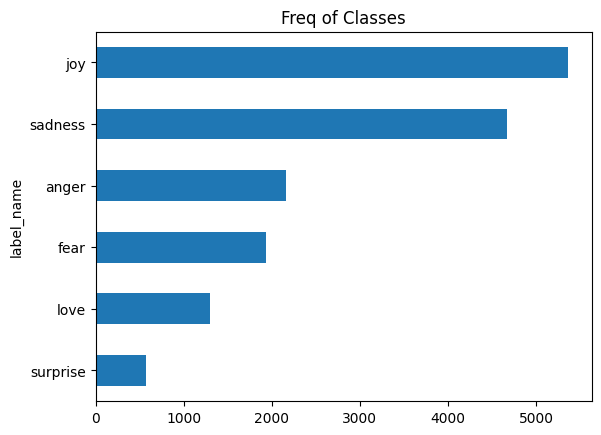

In [18]:
import matplotlib.pyplot as plt
df['label_name'].value_counts(ascending=True).plot.barh()
plt.title("Freq of Classes")
plt.show()

 There are several ways to deal with imbalanced data, including:

Randomly oversample the minority class.

Randomly undersample the majority class.

Gather more labeled data from the underrepresented classes.

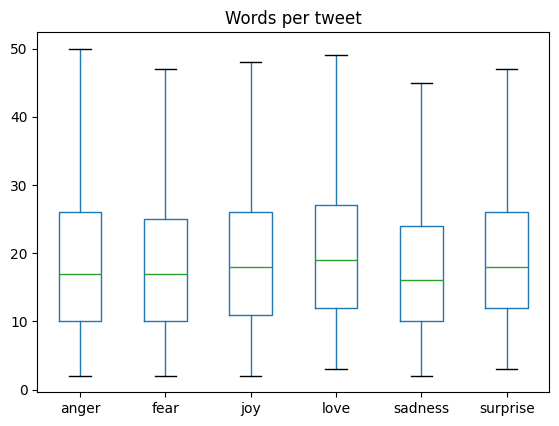

In [19]:
df['Words per tweet']=df['text'].str.split().apply(len)
df.boxplot('Words per tweet',by="label_name",grid = False,showfliers=False)
plt.suptitle("")
plt.xlabel("")
plt.show()

Most people write around 15 to 20 words per tweet

In [20]:
train_ds.reset_format()


In [21]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [22]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [23]:
len(token2idx)

20

In [24]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [25]:
import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

In [26]:
input_ids

tensor([ 5, 14, 12,  8, 13, 11, 19, 11, 13, 10,  0, 17,  8, 18, 17,  0, 11, 16,
         0,  6,  0,  7, 14, 15,  8,  0, 17,  6, 16, 12,  0, 14,  9,  0,  3,  2,
         4,  1])

In [27]:
one_hot_encodings

tensor([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0,


> When using pretrained models, it is really important to make sure that you use the same tokenizer that the model was trained with. From the model’s perspective, switching the tokenizer is like shuffling the vocabulary. If everyone around you started swapping random words like “house” for “cat,” you’d have a hard time understanding what was going on too!



# Tokenization the whole dataset


In [28]:
from transformers import AutoTokenizer

In [29]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

In [30]:
text

'Tokenizing text is a core task of NLP.'

In [31]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [32]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


- some special [CLS] and [SEP] tokens have been added to the start and end of the sequence. These tokens differ from model to model, but their main role is to indicate the start and end of a sequence
- we can see that “tokenizing” and “NLP” have been split into two tokens, which makes sense since they are not common words.
- The ## prefix in ##izing and ##p means that the preceding string is not whitespace, any token with this prefix should be merged with the previous token when you convert the tokens back to a string.

In [33]:
print(tokenizer.convert_tokens_to_string(tokens))


[CLS] tokenizing text is a core task of nlp. [SEP]


we can inspect the vocabulary size for this tokenizer

In [34]:
tokenizer.vocab_size


30522

In [35]:
tokenizer.vocab

{'##ably': 8231,
 'bolivia': 11645,
 '##erin': 23282,
 '##ᵇ': 30033,
 '##titles': 27430,
 '322': 23768,
 'stanton': 15845,
 'dragons': 8626,
 'denmark': 5842,
 'irwin': 17514,
 'scents': 29254,
 'mage': 17454,
 'hut': 12570,
 'fringe': 13548,
 'foundation': 3192,
 'audio': 5746,
 'freud': 19338,
 'danzig': 26669,
 '##ne': 2638,
 '##rrier': 27051,
 'kimberley': 25004,
 'delivering': 12771,
 'carmichael': 23537,
 'secretary': 3187,
 '##mel': 10199,
 '##rnier': 28484,
 '[unused106]': 111,
 'groan': 13001,
 '1804': 13140,
 'kat': 10645,
 'morris': 6384,
 '158': 17696,
 'contrasts': 23347,
 '##ignment': 24838,
 'speedway': 10688,
 '##xon': 22500,
 'mayfield': 27224,
 'fools': 18656,
 'landlord': 18196,
 'kan': 22827,
 'eps': 20383,
 'pictured': 15885,
 '##graphs': 27341,
 '##ced': 11788,
 '##龍': 30508,
 'barge': 19398,
 '##odies': 27391,
 'fireplace': 13788,
 'submarines': 12622,
 'gershwin': 25600,
 'intimacy': 20893,
 'luce': 19913,
 'nicholson': 16955,
 'stressed': 13233,
 'bugs': 12883,

In [36]:
tokenizer.model_max_length


512

attribute to know about is the names of the fields that the model expects in its forward pass:

In [37]:
tokenizer.model_input_names


['input_ids', 'attention_mask']

- padding=True will pad the examples with zeros to the size of the longest one in a batch,
- and truncation=True will truncate the examples to the model’s maximum context size.

In [38]:
emotions_ds = dataset

In [39]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [40]:
print(tokenize(train_ds[:2]))


{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


the first element of input_ids is shorter than the second, so zeros have been added to that element to make them the same length

>the tokenizer returns a list of attention_mask arrays. This is because we do not want the model to get confused by the additional padding tokens: the attention mask allows the model to ignore the padded parts of the input. Figure 2-3 provides a visual explanation of how the input IDs and attention masks are padded.
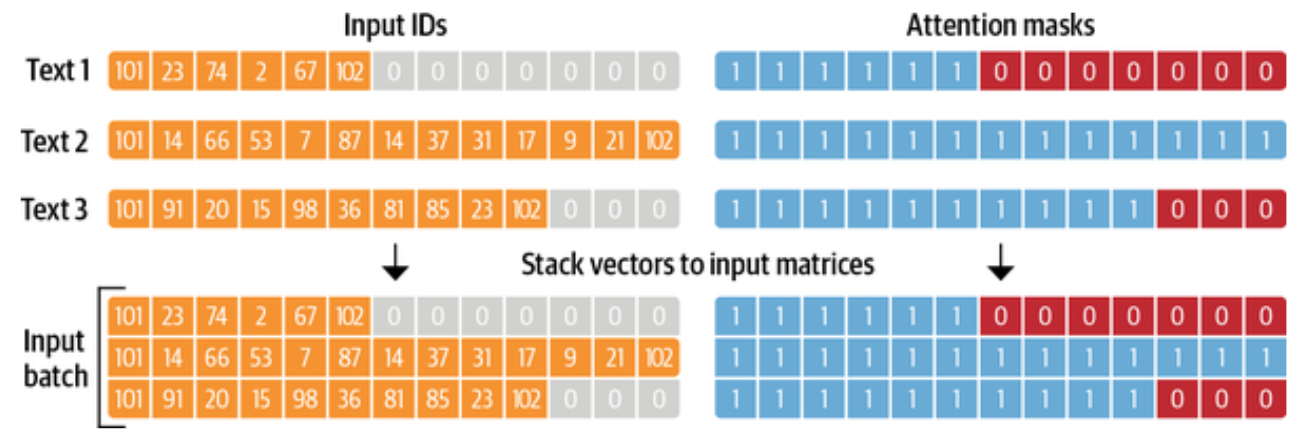
attention-mask
Figure 2-3. For each batch, the input sequences are padded to the maximum sequence length in the batch; the attention mask is used in the model to ignore the padded areas of the input tensors



- By default, the map() method operates individually on every example in the corpus, so setting batched=True will encode the tweets in batches. Because we’ve set batch_size=None, our tokenize() function will be applied on the full dataset as a single batch. This ensures that the input tensors and attention masks have the same shape globally,
____________________

- Why do this? It makes sure that when you create tensors (arrays of numbers for your model), every input and its matching attention mask have the same size throughout the dataset.

- Why is that important? Models need all input data in a batch to have matching shapes (sizes), so this avoids shape mismatches later when training or making predictions.
___________
- avoid using a single large batch if your data is huge, if you need fast or ongoing results, or if you want to update your model frequently. Using smaller batches usually gives you more flexibility, requires less memory, and helps when your data or task is dynamic.

In [41]:
emotions_encoded = emotions_ds.map(tokenize,batched = True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

this operation has added new input_ids and attention_mask columns to the dataset:

In [42]:
print(emotions_encoded)

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})


In [43]:
emotions_encoded['train']["input_ids"]

Column([[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 10047, 9775, 1037, 3371, 2000, 2695, 1045, 2514, 20505, 3308, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2572, 2412, 3110, 16839, 9080, 12863, 2055, 1996, 13788, 1045, 20

In [44]:
len(emotions_encoded['train']["text"])

16000

In [45]:
emotions_encoded['train']["attention_mask"]

Column([[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

We have two options to train such a model on our Twitter dataset:

- Feature extraction

  We use the hidden states as features and just train a classifier on them, without modifying the pretrained model.

- Fine-tuning

  We train the whole model end-to-end, which also updates the parameters of the pretrained model.

In [46]:
from transformers import AutoModel
model_ckpt = "distilbert/distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

**AutoModel** has a **from_pretrained**() method to load the weights of a pretrained model.

The AutoModel class converts the token encodings to embeddings, and then feeds them through the encoder stack to return the hidden states. Let’s take a look at how we can extract these states from our corpus.

In [47]:
text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 6])


In [48]:
inputs

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

In [49]:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


 torch.no_grad() context manager to disable the automatic calculation of the gradient. This is useful for inference since it reduces the memory footprint of the computations.

Think of the last hidden state as the deep, contextual fingerprint of each word in your sentence after the model has "read" it deeply, and we use these fingerprints to do actual tasks like categorizing the sentence or answering questions about it.

In [50]:
outputs.last_hidden_state.size()


torch.Size([1, 6, 768])

In [51]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [52]:
def extract_hidden_states(batch):
    # Place model inputs on the GPU
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}
    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # Return vector for [CLS] token
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

we place the final hidden state back on the CPU as a NumPy array.

In [53]:
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])

 the last hidden state is a kind of embedding—but specifically the context-aware output embedding from the last transformer layer, not the simple static embeddings from the model’s initial embedding lookup.
 In practical NLP tasks, the last hidden state is usually preferred as the representation of tokens because it captures richer, dynamic meanings based on the sentence or input text.

In [54]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)


Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [55]:
type(emotions_hidden)

datasets.dataset_dict.DatasetDict

###Creating a feature matrix


In [56]:
import numpy as np

X_train = np.array(emotions_hidden['train']["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden['train']["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

* MinMaxScaler() adjusts all feature values in X_train so that every column (feature) lies between 0 and 1.
* This scaling helps UMAP work better, as many algorithms perform poorly if features have very different ranges.


# Visualize data and some insights with UMAP dimension reduction algo

In [57]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

In [58]:
X_scaled = MinMaxScaler().fit_transform(X_train)


* Create a UMAP object asking for 2 output dimensions (n_components=2), which is good for visualization.

* Use "cosine" similarity to measure distances, which is often suitable for text/vector data (like embeddings).

* .fit(X_scaled) runs UMAP on your scaled training data to learn the best way to squash high-dimensional data into 2D.


In [59]:
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)


* After UMAP fits the data, mapper.embedding_ holds the new 2D coordinates for each data point.

* Create a Pandas DataFrame with these coordinates, naming the columns "X" and "Y".

* Add the y_train labels as a new column—this lets you color or analyze points by their label in your visualization.

* .head() displays the first few rows of the DataFrame so you can see the transformed data.


In [60]:
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

,X,Y,label
0,4.054903,3.657624,0
1,-3.284470,4.004409,0
2,4.886645,7.053245,3
3,-2.733340,6.310280,2
4,-3.587921,5.994437,3


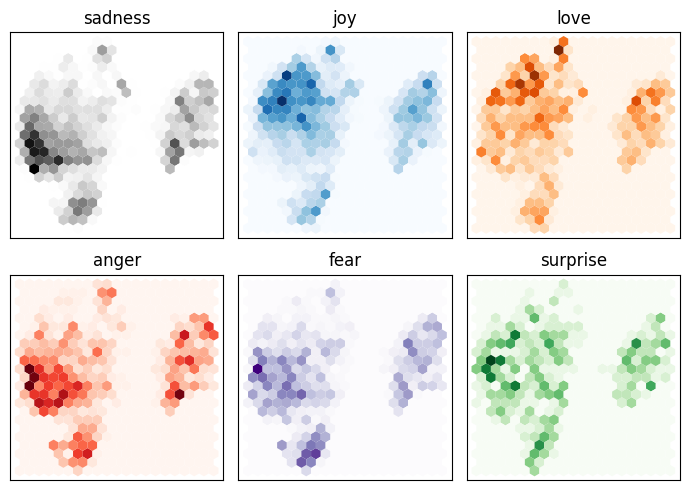

In [61]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels =train_ds.features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

From this plot we can see some clear patterns: the negative feelings such as sadness, anger, and fear all occupy similar regions with slightly varying distributions. On the other hand, joy and love are well separated from the negative emotions and also share a similar space. Finally, surprise is scattered all over the place

# **Training a simple classifier**

In [62]:
from sklearn.linear_model import LogisticRegression

# We increase `max_iter` to guarantee convergence
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.6345

In [63]:
 from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

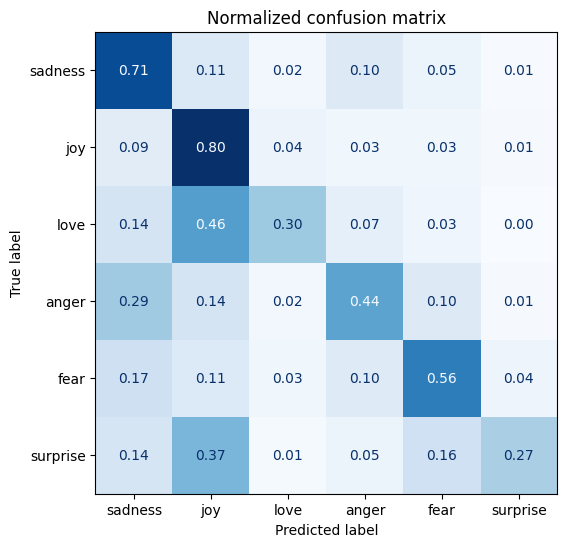

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

We can see that anger and fear are most often confused with sadness, which agrees with the observation we made when visualizing the embeddings. Also, love and surprise are frequently mistaken for joy.

The reason behind the matrix normalization
- Raw confusion matrices show the *number* of predictions per class.
- If your dataset is **imbalanced** (e.g., Class A has 1,000 samples, Class B has 50), the large class will dominate the counts.
- Normalizing turns each cell into a **percentage** of that class’s total, making it easier to see *how well the model performs relative to the size of each class*.

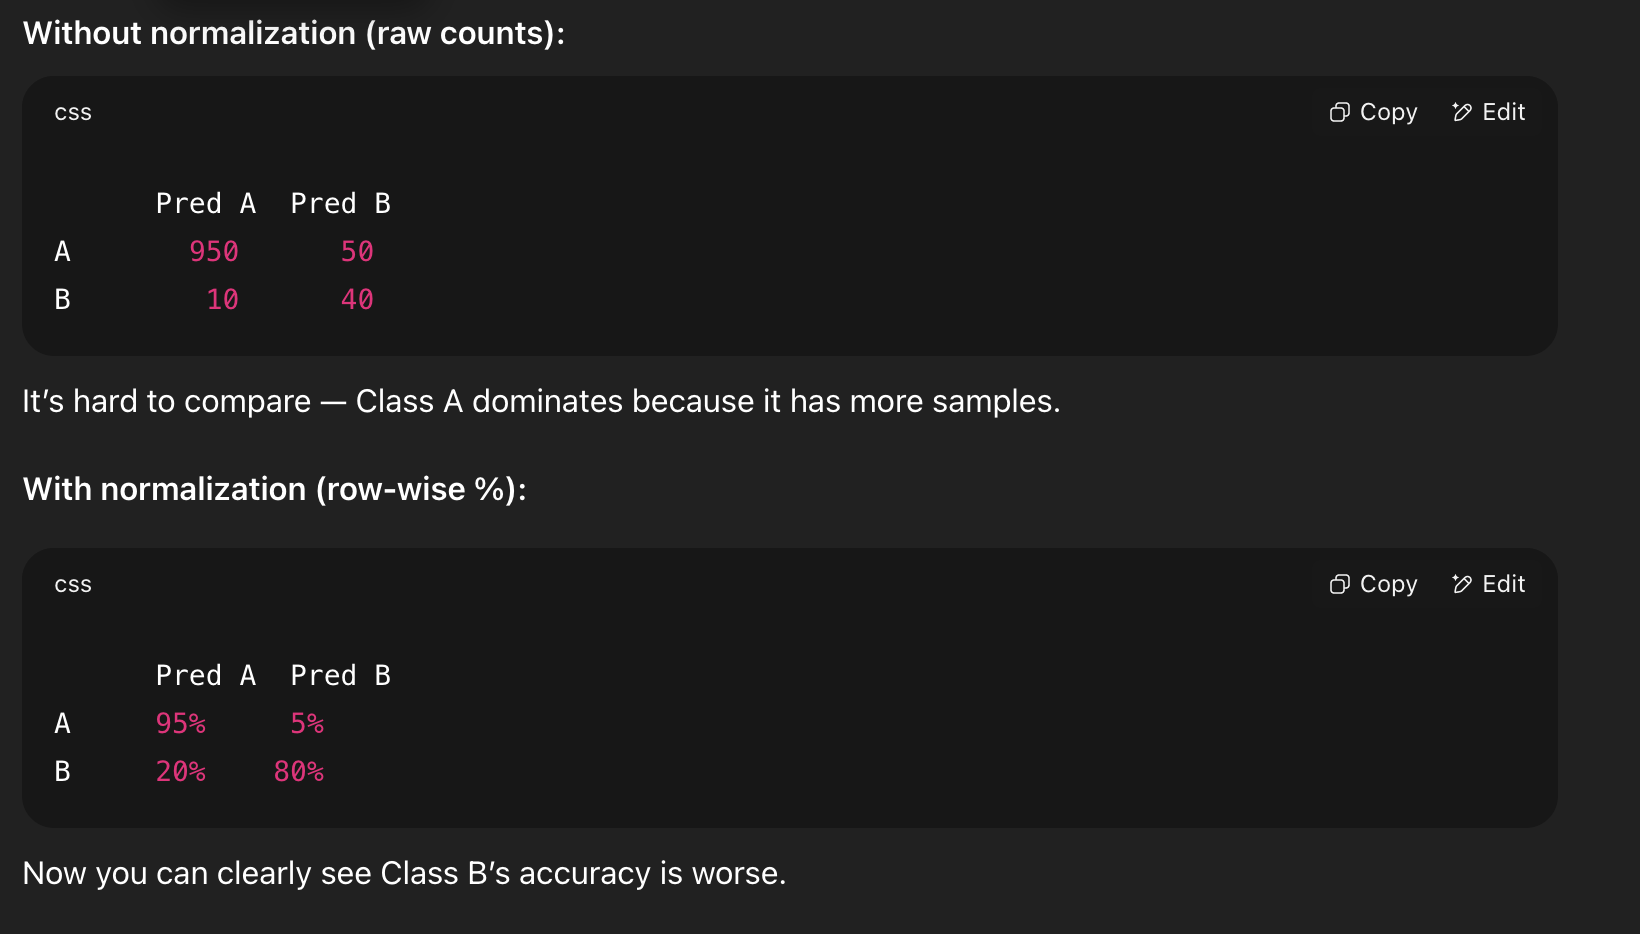

# Fine-Tuning Transformers


1. Loading a pretrained model


The main difference is AutoModel loads only the base pretrained model (like BERT or DistilBERT) and outputs hidden states or embeddings, while AutoModelForSequenceClassification loads the base model plus an added classification head (a linear layer) on top, allowing the model to output logits for classification tasks.

    AutoModel:

        Returns the model's hidden states (contextual embeddings for each token).

        Use this if you want to extract features or embeddings, not predictions.

        Does not include any task-specific layers for classification, question answering, etc.

AutoModelForSequenceClassification:

    Adds a classification head (usually a linear layer) to the end of the base model.

    Outputs logits for class prediction, used for tasks like sentiment or topic classification.

    The whole model (base + head) is trainable for your specific task

In [65]:
from transformers import AutoModelForSequenceClassification

num_labels = 6
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt,num_labels=num_labels).to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


2. Defining the performance metrics


In [66]:
from sklearn.metrics import accuracy_score,f1_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels,preds,average='weighted')
  acc = accuracy_score(labels,preds)
  return {"accuracy":acc,"f1":f1}

3. Training the model





In [70]:
from huggingface_hub import notebook_login

notebook_login()

In [71]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded['train'])// batch_size
model_name = f"{model_ckpt}-fintuned-emotion"
trainig_args = TrainingArguments(output_dir=model_name,
                                 num_train_epochs=2,
                                 learning_rate=2e-5,
                                 per_device_train_batch_size=batch_size,
                                per_device_eval_batch_size=batch_size,
                                 weight_decay = 0.01,
                                #  evaluation_strategy = "epoch",
                                 disable_tqdm=False,
                                 logging_steps=logging_steps,
                                 push_to_hub=True,
                                 log_level='error')

In [72]:
trainer =Trainer(model=model, args=trainig_args,
                 compute_metrics=compute_metrics,
                 train_dataset=emotions_encoded['train'],
                 eval_dataset=emotions_encoded['validation'],
                 tokenizer=tokenizer)
trainer.train();

/tmp/ipython-input-3839852872.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer =Trainer(model=model, args=trainig_args,


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: raghadsayed770 (raghadsayed770-nlp) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
250,0.812000
500,0.249100


In [73]:
preds_output = trainer.predict(emotions_encoded["validation"])


In [74]:
preds_output.metrics


{'test_loss': 0.21548530459403992,
 'test_accuracy': 0.9205,
 'test_f1': 0.9206324532325973,
 'test_runtime': 3.7959,
 'test_samples_per_second': 526.891,
 'test_steps_per_second': 8.43}

In [75]:
y_preds = np.argmax(preds_output.predictions, axis=1)


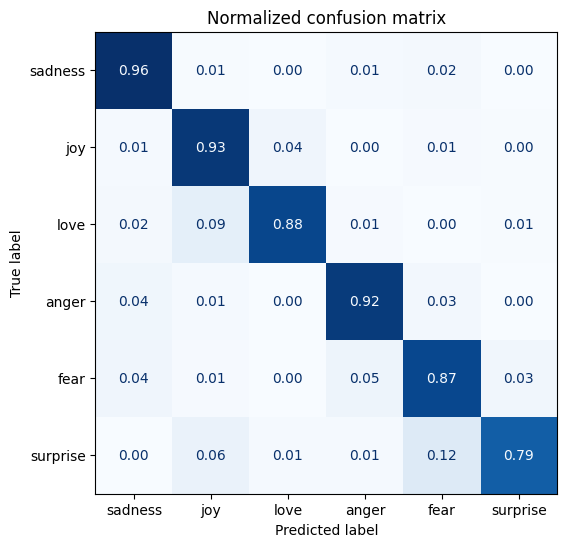

In [76]:
plot_confusion_matrix(y_preds, y_valid, labels)


# Error analysis


In [77]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    # Place all input tensors on the same device as the model
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device),
                             reduction="none")
    # Place outputs on CPU for compatibility with other dataset columns
    return {"loss": loss.cpu().numpy(),
            "predicted_label": pred_label.cpu().numpy()}

In [78]:
# Convert our dataset back to PyTorch tensors
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])
# Compute loss values
emotions_encoded["validation"] = emotions_encoded["validation"].map(
    forward_pass_with_label, batched=True, batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [79]:
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"]
                              .apply(label_int2str))

In [80]:
df_test.sort_values("loss", ascending=False).head(10)


,text,label,predicted_label,loss
1963,i called myself pro life and voted for perry w...,joy,sadness,5.408405
882,i feel badly about reneging on my commitment t...,love,sadness,5.311893
1274,i am going to several holiday parties and i ca...,joy,sadness,5.280486
1801,i feel that he was being overshadowed by the s...,love,sadness,5.229003
1870,i guess i feel betrayed because i admired him ...,joy,sadness,5.176758
1950,i as representative of everything thats wrong ...,surprise,anger,5.110877
1509,i guess this is a memoir so it feels like that...,joy,fear,4.974368
765,i feel super awkward and out of place right now,joy,sadness,4.939605
465,i would eventually go in to these stores but i...,joy,fear,4.681428
1500,i guess we would naturally feel a sense of lon...,anger,sadness,4.459569


In [81]:
df_test.sort_values("loss", ascending=True).head(10)


,text,label,predicted_label,loss
1873,i feel practically virtuous this month i have ...,joy,joy,0.016938
394,i feel shamed that i hoped for one last christ...,sadness,sadness,0.017076
1147,i type i feel bouncy and excited to get out my...,joy,joy,0.017193
632,i feel he is an terrific really worth bet,joy,joy,0.017354
1466,i feel so ungrateful to be wishing this pregna...,sadness,sadness,0.017360
1861,im tired of feeling lethargic hating to work o...,sadness,sadness,0.017362
267,i feel like im alone in missing him and becaus...,sadness,sadness,0.017509
697,i was missing him desperately and feeling idio...,sadness,sadness,0.017510
69,i have no extra money im worried all of the ti...,sadness,sadness,0.017521
1921,i feel the need to write i always want to writ...,joy,joy,0.017548


# Saving and sharing the model on HuggingFace


In [82]:
trainer.push_to_hub(commit_message="Training completed!")


CommitInfo(commit_url='https://huggingface.co/raghad770/distilbert-base-uncased-fintuned-emotion/commit/f769884a65cbb7f9c2f584bf54da46a846b2f0da', commit_message='Training completed!', commit_description='', oid='f769884a65cbb7f9c2f584bf54da46a846b2f0da', pr_url=None, repo_url=RepoUrl('https://huggingface.co/raghad770/distilbert-base-uncased-fintuned-emotion', endpoint='https://huggingface.co', repo_type='model', repo_id='raghad770/distilbert-base-uncased-fintuned-emotion'), pr_revision=None, pr_num=None)

In [83]:
from transformers import pipeline

# Change `transformersbook` to your Hub username
model_id = "transformersbook/distilbert-base-uncased-finetuned-emotion"
classifier = pipeline("text-classification", model=model_id)

config.json:   0%|          | 0.00/872 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [84]:
custom_tweet = "I saw a movie today and it was really good."
preds = classifier(custom_tweet, return_all_scores=True)


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


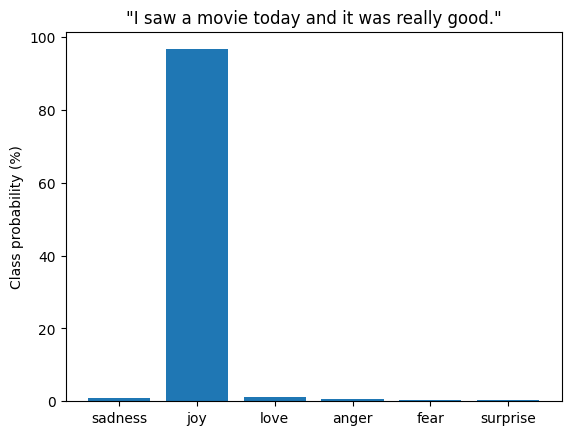

In [85]:
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()

In [86]:
save_directory = "./saved_model"

# Save model
trainer.model.save_pretrained(save_directory)

# Save tokenizer
tokenizer.save_pretrained(save_directory)



('./saved_model/tokenizer_config.json',
 './saved_model/special_tokens_map.json',
 './saved_model/vocab.txt',
 './saved_model/added_tokens.json',
 './saved_model/tokenizer.json')

In [87]:
save_directory = "./saved_model2"

trainer.save_model(save_directory)  # Saves model + config
tokenizer.save_pretrained(save_directory)


No files have been modified since last commit. Skipping to prevent empty commit.


('./saved_model2/tokenizer_config.json',
 './saved_model2/special_tokens_map.json',
 './saved_model2/vocab.txt',
 './saved_model2/added_tokens.json',
 './saved_model2/tokenizer.json')